In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

cwd = os.getcwd()
ec_label1 = ['Intermediate Connectivity Structure', 'High Connectivity Structure']
ec_label2 = ['ICS', 'HCS']

D = 2                   # dimensionality
L = 1024                # lineal size
lc = 16                 # correlation lenght
variance = [0.5, 2]
realizations = 55

map_realization = 110    # change to display different realizations [0..127]
v = 1                    # contrast [0.1 .. ]
cmap = 'binary'          # 'plasma', 'viridis', 'cividis', 'Blues', etc.

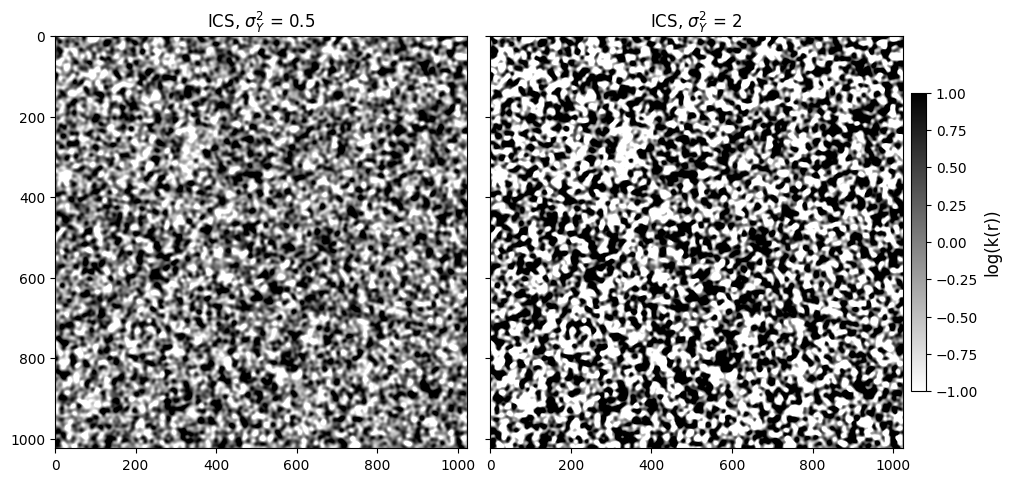

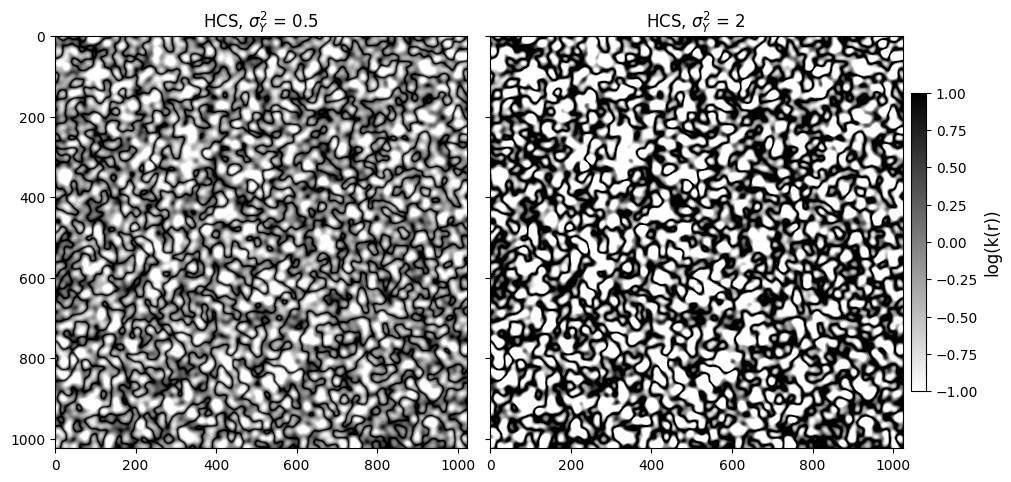

In [2]:
### Map visualization of log(K)

for ic in range(len(ec_label2)):
    fig, ax = plt.subplots(1, 2, layout='constrained', figsize=(10, 20), sharey=True)
    for ivar in range(len(variance)):
        kmap = np.load(cwd + '/X_1024L_' + ec_label2[ic] + '_' + str(variance[ivar]) + '.npy')[map_realization]
        im = ax[ivar].imshow(np.log(kmap), cmap=cmap, vmin=-v, vmax=v)
        ax[ivar].set_title(ec_label2[ic]+', '+r"$\sigma^2_{Y}$"+' = '+str(variance[ivar]), fontsize=12)
    cb = fig.colorbar(im, shrink=0.15, orientation='vertical', pad=0.001)#, ax=ax.ravel().tolist())
    cb.set_label(label='log(k(r))', fontsize=12)

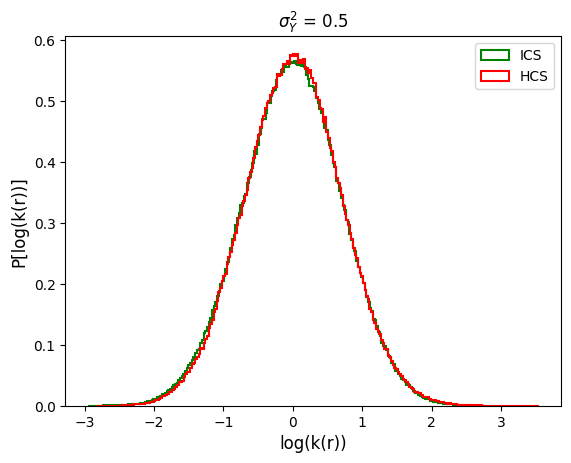

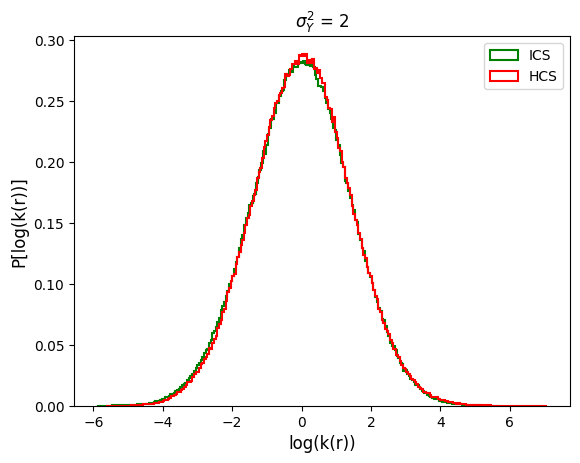

In [18]:
### PDFs of log(K)         
color = ['g', 'r']
variance = ['0.5', '2']
for ivar in range(len(variance)):
    for ic in range(len(ec_label2)):
        kmap = np.load(cwd + '/X_1024L_' + ec_label2[ic] + '_' + str(variance[ivar]) + '.npy')[map_realization]
        kmap = kmap.reshape(-1)
        plt.hist(np.log(kmap), bins='scott', density=True, histtype='step', color=color[ic], lw=1.5, label=ec_label2[ic])
        plt.xlabel('log(k(r))', fontsize=12)
        plt.ylabel('P[log(k(r))]', fontsize=12)
        plt.legend()
        plt.title(r"$\sigma^2_{Y}$" + ' = ' + str(variance[ivar]), fontsize=12)
    plt.show()

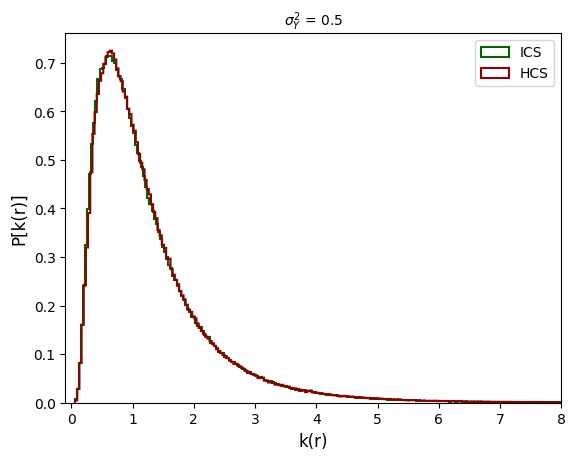

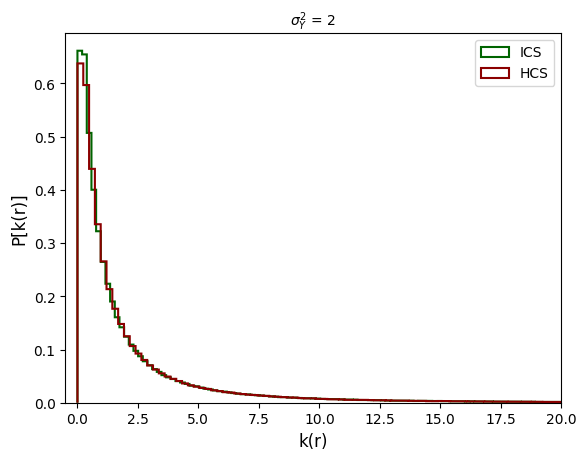

In [19]:
### PDFs of k        
color = ['g', 'r']

color = ['darkgreen', 'darkred']
variance = ['0.5', '2']
xlim = [[-0.1, 8], [-0.5, 20]]

for ivar in range(len(variance)):
    for ic in range(len(ec_label2)):
        kmap = np.load(cwd + '/X_1024L_' + ec_label2[ic] + '_' + str(variance[ivar]) + '.npy')[map_realization]
        kmap = kmap.reshape(-1)
        plt.hist(kmap, bins='scott', density=True, histtype='step', color=color[ic], lw=1.5, label=ec_label2[ic])
        plt.xlim(xlim[ivar])
        plt.xlabel('k(r)', fontsize=12)
        plt.ylabel('P[k(r)]', fontsize=12)
        plt.legend()
        plt.title(r"$\sigma^2_{Y}$" + ' = ' + str(variance[ivar]), fontsize=10)
    plt.show()

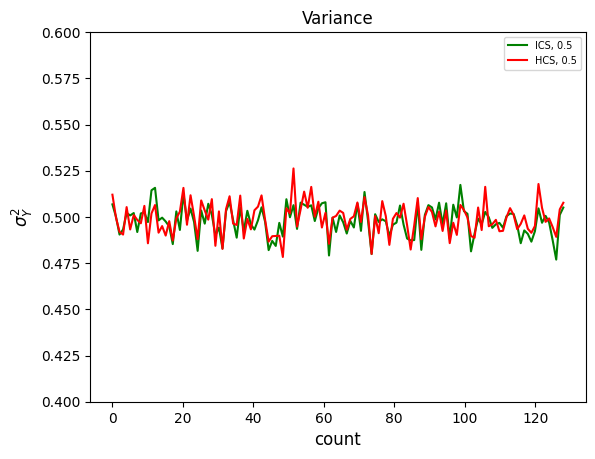

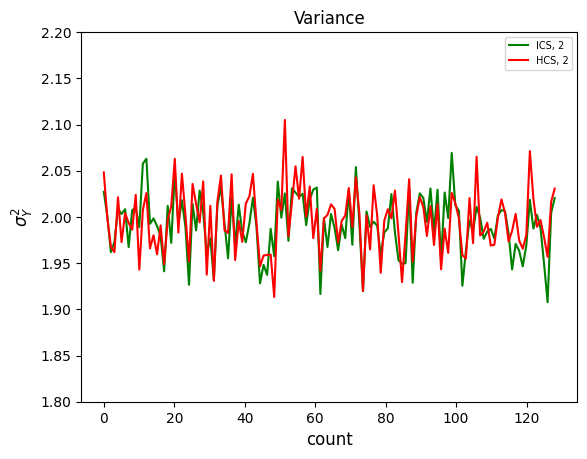

In [7]:
### Variance plots

x_sim = np.linspace(0, 128, 128)
color = ['g', 'r']
variance = ['0.5', '2']
for ivar in range(len(variance)):    
    for ic in range(len(ec_label2)):
    #fig, ax = plt.subplots(1, 2, layout='constrained', figsize=(10, 4), sharey=False)
    
        var = np.array([])
        mean = np.array([])
        kmap = np.load(cwd + '/X_1024L_' + ec_label2[ic] + '_' + str(variance[ivar]) + '.npy')
        
        #kmap_std = (kmap - 0.5629771443398196) / 0.5629771443398196             # kmap_std = (kmap - mean_HCS) / std_ICS
        
        for ireal in range(128):
            #if ic == 1:
            var = np.append(var, np.var(np.log(kmap[ireal].reshape(-1))))
            #else:
            #    var = np.append(var, np.var(np.log(kmap[ireal].reshape(-1))))
            
        plt.plot(x_sim, var, label=ec_label2[ic] + ', ' + str(variance[ivar]), color=color[ic])
        plt.legend(loc='best', fontsize=7)
        plt.xlabel('count', fontsize=12)
        plt.ylabel(r"$\sigma^2_{Y}$", fontsize=12)
        plt.title('Variance')
        if ivar == 0:
            plt.ylim(0.4, 0.6)
        else:
            plt.ylim(1.8, 2.2)
    plt.show()
        #plt.plot(x_sim, mean, label=ec_label2[ic] + ', ' + str(variance[ivar]))
        #plt.legend()
        #plt.show()
        #ax[ivar].plot(x_sim, mean, label=ec_label2[ic])
        #plt.legend()


In [48]:
### Variance  normalization
# To standarized one distribution with respect to the variance of another, normalization or rescaling an be performed 
# using the reference variance.
# Assume two random variables X and Y, with respective means and variances: mu_X, sigma_X^2 and mu_Y, sigma_Y^2.
# To standarize X as a function of sigma_Y^2:
# 1 - Substract mu_X: center X by subtracting the mean: X'=X-mu_X. 
# 2 - Scale with the standard deviation of Y: divide X' by sigma_Y: X'/sigma_Y.

ec_lab = ['ICS', 'HCS']

x_sim = np.linspace(0, 128, 128)
color = ['g', 'r']
variance = ['0.5', '2']
for ic in range(len(ec_lab)):
    #fig, ax = plt.subplots(1, 2, layout='constrained', figsize=(10, 4), sharey=False)
    for ivar in range(len(variance)):
        var = np.array([])
        mean = np.array([])
        std = np.array([])
        kmap = np.load(cwd + '/X_1024L_' + ec_lab[ic] + '_' + str(variance[ivar]) + '.npy')
        for ireal in range(128):
            var = np.append(var, np.var(np.log(kmap[ireal].reshape(-1))))
            mean = np.append(mean, np.exp(np.mean(np.log(kmap[ireal].reshape(-1)))))
            std = np.append(std, np.std(np.log(kmap[ireal].reshape(-1))))
    
        print(f'Mean {ec_lab[ic]}, {variance[ivar]}: {np.mean(mean)}')
        print(f'Std {ec_lab[ic]}, {variance[ivar]}: {np.mean(std)}') 
        print(f'Var {ec_lab[ic]}, {variance[ivar]}: {np.mean(var)}')

     



Mean ICS, 0.5: 1.0007652745911426
Std ICS, 0.5: 0.7055534510082226
Var ICS, 0.5: 0.49783790538371386
Mean ICS, 2: 1.0016360098130752
Std ICS, 2: 1.4111069020164453
Var ICS, 2: 1.9913516215348555
Mean HCS, 0.5: 1.0038058739236442
Std HCS, 0.5: 0.706337373744878
Var HCS, 0.5: 0.4989480942843158
Mean HCS, 2: 1.0077485320563357
Std HCS, 2: 1.412674747489756
Var HCS, 2: 1.9957923771372634


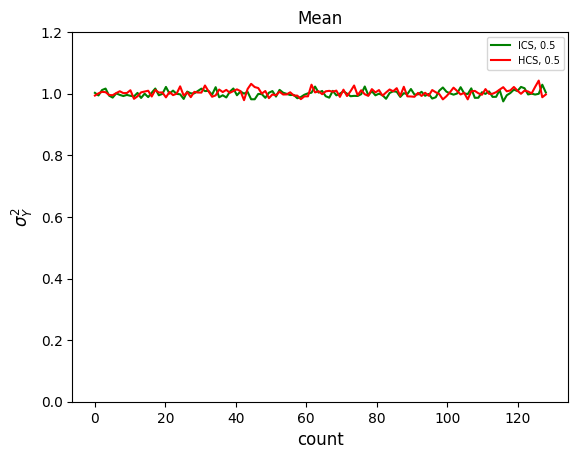

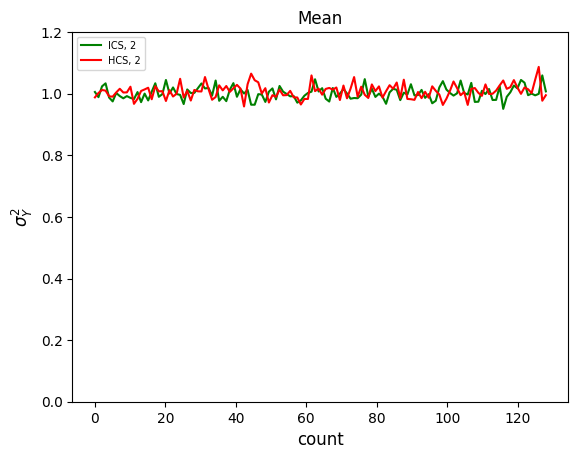

In [8]:
### Mean plots

x_sim = np.linspace(0, 128, 128)
color = ['g', 'r']
variance = ['0.5', '2']
for ivar in range(len(variance)):    
    for ic in range(len(ec_label2)):
    #fig, ax = plt.subplots(1, 2, layout='constrained', figsize=(10, 4), sharey=False)
    
        var = np.array([])
        mean = np.array([])
        kmap = np.load(cwd + '/X_1024L_' + ec_label2[ic] + '_' + str(variance[ivar]) + '.npy')
        
        #kmap_std = (kmap - 0.5629771443398196) / 0.5629771443398196             # kmap_std = (kmap - mean_HCS) / std_ICS
        
        for ireal in range(128):
            var = np.append(var, np.exp(np.mean((np.log(kmap[ireal].reshape(-1))))))
          
            
        plt.plot(x_sim, var, label=ec_label2[ic] + ', ' + str(variance[ivar]), color=color[ic])
        plt.legend(loc='best', fontsize=7)
        plt.xlabel('count', fontsize=12)
        plt.ylabel(r"$\sigma^2_{Y}$", fontsize=12)
        plt.title('Mean')
        plt.ylim(0, 1.2)
    plt.show()

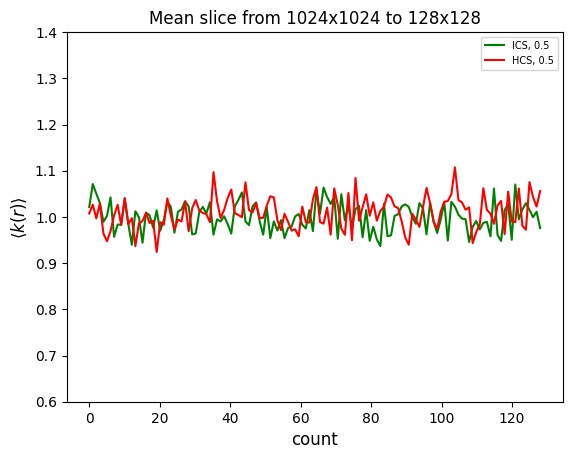

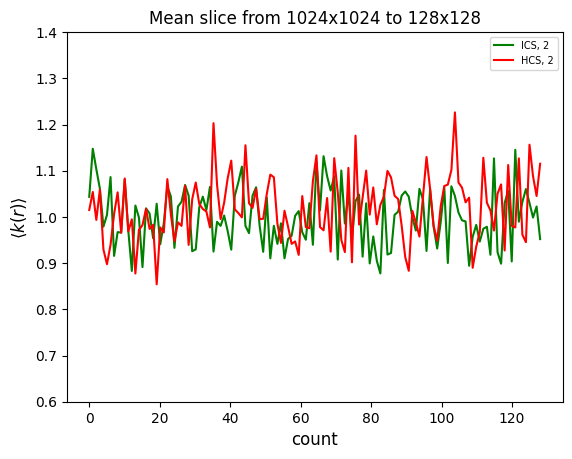

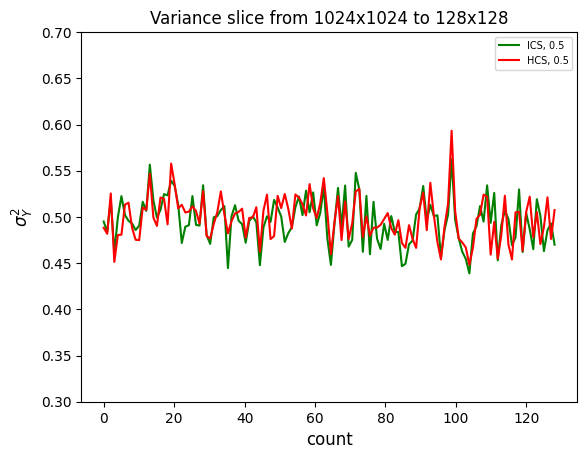

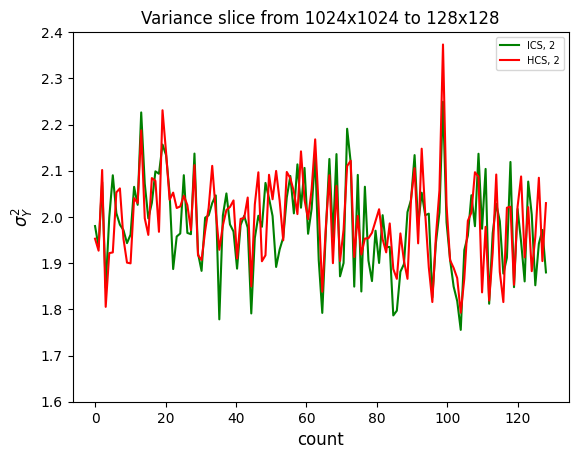

In [52]:
### Slice from 1024x1024 to 128x128

#matrix_128 = matrix_1024[:128, :128]

x_sim = np.linspace(0, 128, 128)
color = ['g', 'r']
for ivar in range(len(variance)):    
    for ic in range(len(ec_label2)):
    #fig, ax = plt.subplots(1, 2, layout='constrained', figsize=(10, 4), sharey=False)

        mean = np.array([])
        kmap = np.load(cwd + '/X_1024L_' + ec_label2[ic] + '_' + str(variance[ivar]) + '.npy')[:128, :128]
        kmap_slice = kmap[:128, :128]
       
        for ireal in range(128):
            mean = np.append(mean, np.exp(np.mean(np.log(kmap_slice[ireal]))))
    
        plt.plot(x_sim, mean, label=ec_label2[ic] + ', ' + str(variance[ivar]), color=color[ic])
        plt.legend(fontsize=7, loc='best')
        plt.xlabel('count', fontsize=12)
        plt.ylabel(r'$⟨k(r)⟩$', fontsize=12)
        plt.ylim(0.6, 1.4)
        plt.title('Mean slice from 1024x1024 to 128x128')
    plt.show()
        #plt.plot(x_sim, mean, label=ec_label2[ic] + ', ' + str(variance[ivar]))
        #plt.legend()
        #plt.show()
        #ax[ivar].plot(x_sim, mean, label=ec_label2[ic])
        #plt.legend()

### Variance plots

x_sim = np.linspace(0, 128, 128)
color = ['g', 'r']
variance = ['0.5', '2']
for ivar in range(len(variance)):    
    for ic in range(len(ec_label2)):
    #fig, ax = plt.subplots(1, 2, layout='constrained', figsize=(10, 4), sharey=False)
    
        var = np.array([])
        mean = np.array([])
        kmap = np.load(cwd + '/X_1024L_' + ec_label2[ic] + '_' + str(variance[ivar]) + '.npy')
        kmap_slice = kmap[:128, :128]
        
        for ireal in range(128):
            var = np.append(var, np.var(np.log(kmap_slice[ireal].reshape(-1))))

        plt.plot(x_sim, var, label=ec_label2[ic] + ', ' + str(variance[ivar]), color=color[ic])
        plt.legend(loc='best', fontsize=7)
        plt.xlabel('count', fontsize=12)
        plt.ylabel(r"$\sigma^2_{Y}$", fontsize=12)
        if ivar == 0:
            plt.ylim(0.3, 0.7)
        else:
            plt.ylim(1.6, 2.4)
        plt.title('Variance slice from 1024x1024 to 128x128')
    plt.show()

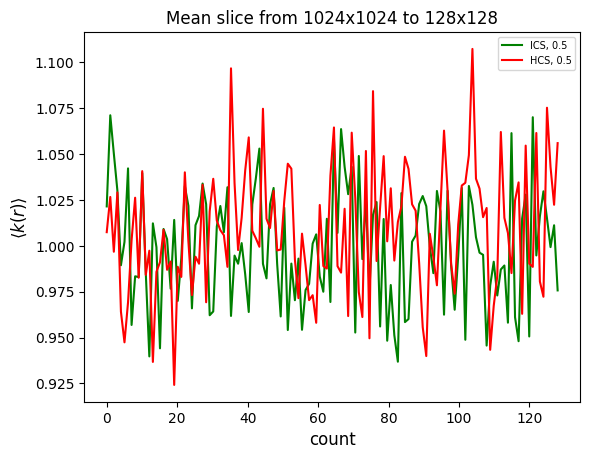

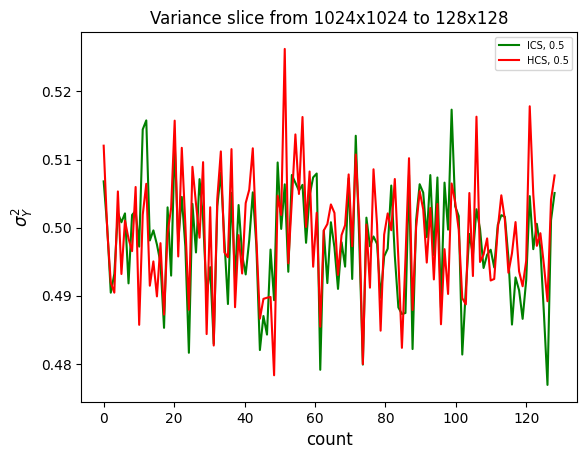

In [55]:
### Slice from 1024x1024 to 128x128

#matrix_128 = matrix_1024[:128, :128]

variance = ['0.5']
x_sim = np.linspace(0, 128, 128)
color = ['g', 'r']
for ivar in range(len(variance)):    
    for ic in range(len(ec_label2)):
    #fig, ax = plt.subplots(1, 2, layout='constrained', figsize=(10, 4), sharey=False)

        mean = np.array([])
        kmap = np.load(cwd + '/X_1024L_' + ec_label2[ic] + '_' + str(variance[ivar]) + '.npy')[:128, :128]
        
       
        for ireal in range(128):
            mean = np.append(mean, np.exp(np.mean(np.log(kmap[ireal]))))
    
        plt.plot(x_sim, mean, label=ec_label2[ic] + ', ' + str(variance[ivar]), color=color[ic])
        plt.legend(fontsize=7, loc='best')
        plt.xlabel('count', fontsize=12)
        plt.ylabel(r'$⟨k(r)⟩$', fontsize=12)
        plt.title('Mean slice from 1024x1024 to 128x128')
    plt.show()
        #plt.plot(x_sim, mean, label=ec_label2[ic] + ', ' + str(variance[ivar]))
        #plt.legend()
        #plt.show()
        #ax[ivar].plot(x_sim, mean, label=ec_label2[ic])
        #plt.legend()

### Variance plots

x_sim = np.linspace(0, 128, 128)
color = ['g', 'r']

for ivar in range(len(variance)):    
    for ic in range(len(ec_label2)):
    #fig, ax = plt.subplots(1, 2, layout='constrained', figsize=(10, 4), sharey=False)
    
        var = np.array([])
        mean = np.array([])
        kmap = np.load(cwd + '/X_1024L_' + ec_label2[ic] + '_' + str(variance[ivar]) + '.npy')
     
        
        for ireal in range(128):
            var = np.append(var, np.var(np.log(kmap[ireal].reshape(-1))))

        plt.plot(x_sim, var, label=ec_label2[ic] + ', ' + str(variance[ivar]), color=color[ic])
        plt.legend(loc='best', fontsize=7)
        plt.xlabel('count', fontsize=12)
        plt.ylabel(r"$\sigma^2_{Y}$", fontsize=12)

        plt.title('Variance slice from 1024x1024 to 128x128')
    plt.show()